In [1]:
#load neccesary packages
using Eirene
using CSV
using DataFrames
using Plots
using RCall
using Combinatorics
using Statistics
using StatsPlots
using RDatasets
using HypothesisTests

R"library(TDA)"

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6689999979871168104\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-16062399371480484598\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/assetserver/1fa6eab5d5e3561aa5d446967b44427fb11bbe3a-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-6689999979871168104\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")


R version 3.6.0 (2019-04-26) -- "Planting of a Tree"
Copyright (C) 2019 The R Foundation for Statistical Computing
Platform: x86_64-w64-mingw32/x64 (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.



┌ Warning: RCall.jl: Warning: package 'TDA' was built under R version 3.6.1
└ @ RCall C:\Users\Tupperware93\.julia\packages\RCall\iojZI\src\io.jl:113


RObject{StrSxp}
[1] "TDA"       "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     


In [4]:
#load the adjacency matrix
adjacencyMatrix = CSV.read("C://Users//Tupperware93//fullGraphAdjacencyMatrix.csv", copycols = true, header = false)
BirthTimes = CSV.read("C://Users//Tupperware93//Downloads//From Gene Expression File//279birthTimes.csv", copycols = true, header = false)

,Column1
,Float64
1,438.94
2,438.8
3,438.94
4,440.21
5,294.34
6,293.47
7,303.77
8,306.17
9,314.15


In [5]:
#get a matrix of birth times and sort it
birthTimes = zeros(279)
for i in 1:279
    birthTimes[i] = (BirthTimes[1])[i]
end

sort!(birthTimes)

279-element Array{Float64,1}:
  253.08
  278.01
  291.01
  293.47
  293.47
  293.65
  294.34
  294.34
  295.0 
  295.41
  295.6 
  296.25
  296.3 
    ⋮   
 1752.4 
 1752.4 
 1866.7 
 1892.1 
 2005.3 
 2005.3 
 2100.4 
 2100.4 
 2100.4 
 2100.4 
 2324.7 
 2324.7 

In [6]:
#construct a matrix storing all connected pairs (there are 2287 connections)
connectionsList = zeros(2287,2)

counter = 0
for i in 2:279
    for j in 1:i-1
        if adjacencyMatrix[i,j] < 300
            counter += 1
            connectionsList[counter,1] = i
            connectionsList[counter,2] = j
        end
    end
end

In [7]:
#make a null model replica where we perform 22870 pairwise swaps to generate a random graph with equal degree distribution
ncopies = 100

#make ncopies slots to place copies of adjacency matrix, and pre-load with 300s
nullModel = zeros(279,279,ncopies)
for k in 1:ncopies
    for i in 1:279
        for j in 1:279
            nullModel[i,j,k] = 300
        end
    end
end


for k in 1:ncopies
        
    #perform 22870 pairwise swaps on the connection list, the wise nullModel[:,:,k] with those
    connectionHolder = connectionsList[:,:]
    for i in 1:22870
        edge1 = trunc(Int,rand(1:2287))
        edge2 = trunc(Int,rand(1:2287))
        
        shadowCache = connectionHolder[edge1,2]
        connectionHolder[edge1,2] = connectionHolder[edge2,1]
        connectionHolder[edge2,1] = connectionHolder[edge1,2]
    end
    
    for i in 1:2287
        initial = trunc(Int,connectionHolder[i,1])
        terminal = trunc(Int,connectionHolder[i,2])
        nullModel[initial,terminal,k] = maximum([initial,terminal])
        nullModel[terminal,initial,k] = maximum([initial,terminal])
    end
end

    
    

In [8]:
BettiCurves = zeros(279,3,ncopies)

for k in 1:ncopies
    
    println(k)

#computes the betti curves in 0-2 dimensions

eireneMatrix = eirene(nullModel[:,:,k], model = "vr", minrad = 0.5, maxrad = 301, maxdim = 2)

#make stuff to store betti curves

barcodes = barcode(eireneMatrix, dim=0)
bigness = size(barcodes,1)
bettiNumber = 0

#calculate and store dimension 0 betti values
for i in 1:bigness
        if barcodes[i,1] == 1
            bettiNumber +=1
        end
end
    
BettiCurves[1,1,k] = bettiNumber

for i in 2:279
        for j in 1:bigness
            if barcodes[j,1] == i
                bettiNumber += 1
            end
            if barcodes[j,2] == i
                bettiNumber -= 1
            end
        end
        BettiCurves[i,1,k] = bettiNumber
end

#calculate and store dimension 1 betti values (resetting variables first)
barcodes = barcode(eireneMatrix, dim=1)
bigness = size(barcodes,1)
bettiNumber = 0

for i in 1:bigness
        if barcodes[i,1] == 1
            bettiNumber +=1
        end
end
    
BettiCurves[1,2,k] = bettiNumber

for i in 2:279
        for j in 1:bigness
            if barcodes[j,1] == i
                bettiNumber += 1
            end
            if barcodes[j,2] == i
                bettiNumber -= 1
            end
        end
        BettiCurves[i,2,k] = bettiNumber
end

#calculate and store dimension 2 betti values (resetting variables first)
barcodes = barcode(eireneMatrix, dim=2)
bigness = size(barcodes,1)
bettiNumber = 0

for i in 1:bigness
        if barcodes[i,1] == 1
            bettiNumber +=1
        end
end
    
BettiCurves[1,3,k] = bettiNumber

for i in 2:279
        for j in 1:bigness
            if barcodes[j,1] == i
                bettiNumber += 1
            end
            if barcodes[j,2] == i
                bettiNumber -= 1
            end
        end
        BettiCurves[i,3,k] = bettiNumber
end
end

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [9]:
#computes average and standard deviation of 1000 copies
bettiMeans = zeros(279,3)
bettiStd = zeros(279,3)

for i in 1:279
    bettiMeans[i,1] = mean(BettiCurves[i,1,:])
    bettiMeans[i,2] = mean(BettiCurves[i,2,:])
    bettiMeans[i,3] = mean(BettiCurves[i,3,:])
    
    bettiStd[i,1] = std(BettiCurves[i,1,:])
    bettiStd[i,2] = std(BettiCurves[i,2,:])
    bettiStd[i,3] = std(BettiCurves[i,3,:])
end

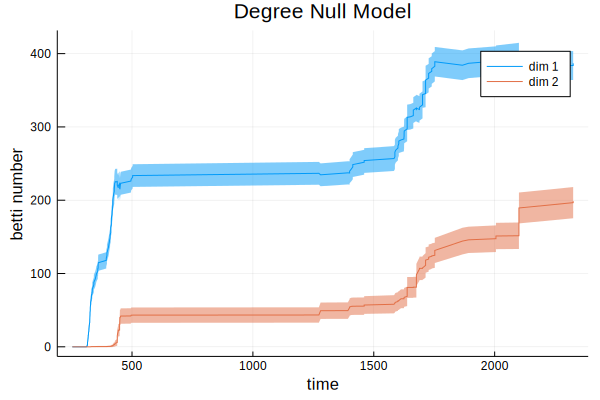

In [10]:
plot(birthTimes[:], bettiMeans[:,2:3], ribbon = bettiStd[:,2:3], label = ["dim 1", "dim 2"], title = "Degree Null Model", xlabel = "time", ylabel = "betti number")

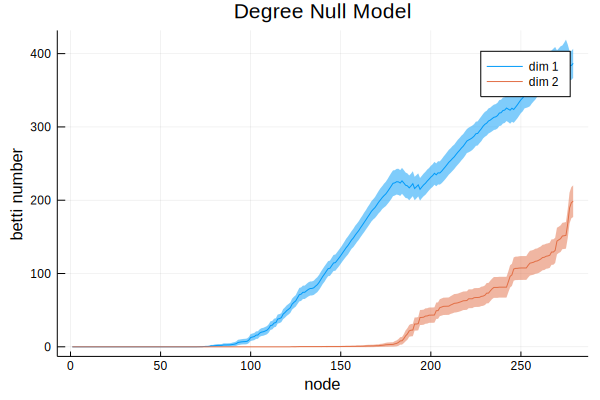

In [11]:
plot(1:279, bettiMeans[:,2:3], ribbon = bettiStd[:,2:3], label = ["dim 1", "dim 2"], title = "Degree Null Model", xlabel = "node", ylabel = "betti number")

In [12]:
#find the average birth/death rates of the null models



#construct rates matrix for each dimension using a +/- 5 window. column 1 is birth rate, column 2 is death rate
dimensionOneRates = zeros(279,2,ncopies)
dimensionTwoRates = zeros(279,2,ncopies)

for k in 1:ncopies
    println(k)

#find birth and death rate graphs of cavities in dimension 1 and 2 for the kth graph
eireneGraph = eirene(nullModel[:,:,k], model = "vr", minrad = 0.5, maxrad = 301, maxdim = 2)
barcodesOne = barcode(eireneGraph, dim =1)
barcodesTwo = barcode(eireneGraph, dim = 2)


for i in 1:279
    #make and clear counters for new barcodes born and dying in each i+/-5 window
    newBirths1 = 0
    newDeaths1 = 0
    newBirths2 = 0
    newDeaths2 = 0
    
    #look through each barcode to see if one either is born or dies at time i+/1 5
    for j in i-5:i+1
        
        #handle case where j<1
        if j > 0
            newBirths1 += size(findall(x -> x == j, barcodesOne[:,1]))[1]
            newDeaths1 += size(findall(x -> x == j, barcodesOne[:,2]))[1]
        end
        
        if j > 0
            newBirths2 += size(findall(x -> x == j, barcodesTwo[:,1]))[1]
            newDeaths2 += size(findall(x -> x == j, barcodesTwo[:,2]))[1]
        end
    end
        
        
    #set rates at i to be the number of births/deaths in the window centered at i divided by the size of that window
        
    #handle case where i is too close to boundary and the width is not quite 11
    if i <= 5 
        minimum = 1
    end
    if i > 5
        minimum = i-5
    end
    
    if i <= 274 
        maximum = i+5
    end
    if i > 274
        maximum = 279
    end
    
    norm = maximum - minimum + 1
        
    dimensionOneRates[i,1,k] = newBirths1/norm
    dimensionOneRates[i,2,k] = newDeaths1/norm
    dimensionTwoRates[i,1,k] = newBirths2/norm
    dimensionTwoRates[i,2,k] = newDeaths2/norm
    
end
end
println("output: dimensionOneRates and dimensionTwoRates")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
output: dimensionOneRates and dimensionTwoRates


In [13]:
#computes average and standard deviation of birth/death rates
dimOneRateAve = zeros(279,2)
dimOneRateStd = zeros(279,2)
dimTwoRateAve = zeros(279,2)
dimTwoRateStd = zeros(279,2)

for i in 1:279
    dimOneRateAve[i,1] = mean(dimensionOneRates[i,1,:])
    dimOneRateAve[i,2] = mean(dimensionOneRates[i,2,:])
    dimTwoRateAve[i,1] = mean(dimensionTwoRates[i,1,:])
    dimTwoRateAve[i,2] = mean(dimensionTwoRates[i,2,:])
    
    
    dimOneRateStd[i,1] = std(dimensionOneRates[i,1,:])
    dimOneRateStd[i,2] = std(dimensionOneRates[i,2,:])
    dimTwoRateStd[i,1] = std(dimensionTwoRates[i,1,:])
    dimTwoRateStd[i,2] = std(dimensionTwoRates[i,2,:])
end

In [16]:
dimensionOneRates 

UndefVarError: UndefVarError: dimensionOneRates not defined

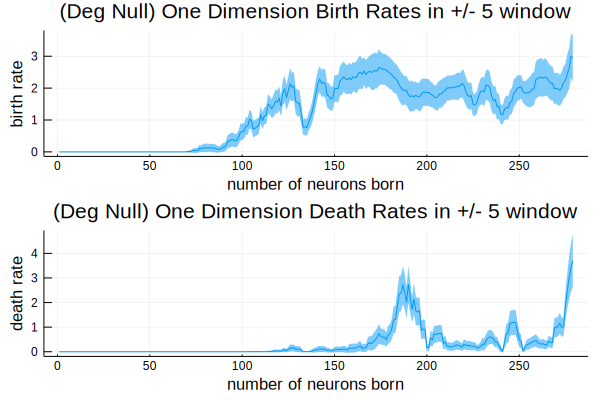

In [14]:
#plot the one dimension birth and death rates by number of neurons born
p1 = plot(1:279, dimOneRateAve[:,1], ribbon = dimOneRateStd[:,1], title = "(Deg Null) One Dimension Birth Rates in +/- 5 window", legend = false, label = ["birth rate"], xlabel = "number of neurons born", ylabel = "birth rate")
p2 = plot(1:279, dimOneRateAve[:,2], ribbon = dimOneRateStd[:,2], title = "(Deg Null) One Dimension Death Rates in +/- 5 window", legend = false, label = ["death rate"], xlabel = "number of neurons born", ylabel = "death rate")

plot(p1, p2, layout = (2,1))

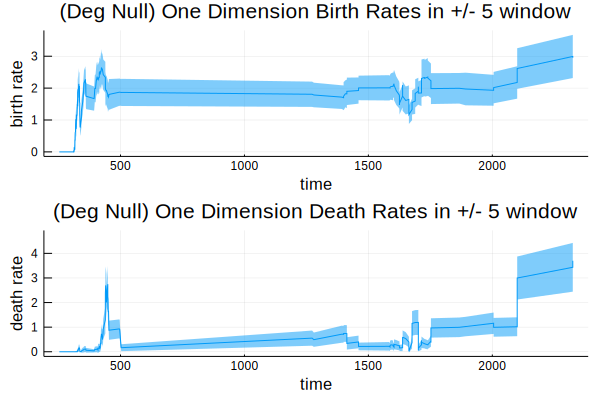

In [15]:
#plot the one dimension birth and death rates by time
p1 = plot(birthTimes[:], dimOneRateAve[:,1], ribbon = dimOneRateStd[:,1], title = "(Deg Null) One Dimension Birth Rates in +/- 5 window", legend = false, label = ["birth rate"], xlabel = "time", ylabel = "birth rate")
p2 = plot(birthTimes[:], dimOneRateAve[:,2], ribbon = dimOneRateStd[:,2], title = "(Deg Null) One Dimension Death Rates in +/- 5 window", legend = false, label = ["death rate"], xlabel = "time", ylabel = "death rate")

plot(p1, p2, layout = (2,1))

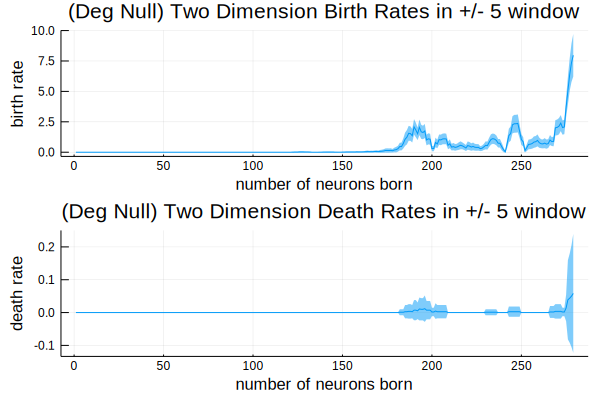

In [16]:
#plot the one dimension birth and death rates by number of neurons born
p1 = plot(1:279, dimTwoRateAve[:,1], ribbon = dimTwoRateStd[:,1], title = "(Deg Null) Two Dimension Birth Rates in +/- 5 window", legend = false, label = ["birth rate"], xlabel = "number of neurons born", ylabel = "birth rate")
p2 = plot(1:279, dimTwoRateAve[:,2], ribbon = dimTwoRateStd[:,2], title = "(Deg Null) Two Dimension Death Rates in +/- 5 window", legend = false, label = ["death rate"], xlabel = "number of neurons born", ylabel = "death rate")

plot(p1, p2, layout = (2,1))

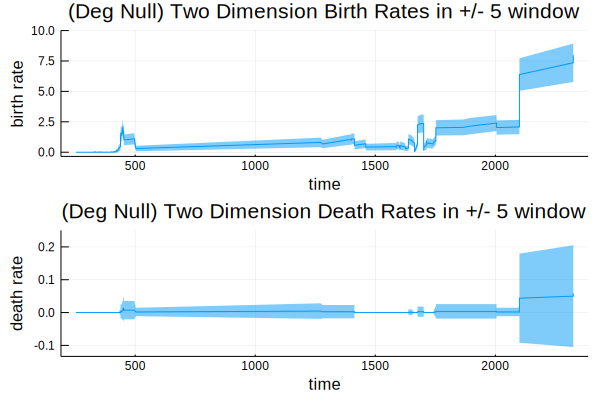

In [17]:
#plot the one dimension birth and death rates by time
p1 = plot(birthTimes[:], dimTwoRateAve[:,1], ribbon = dimTwoRateStd[:,1], title = "(Deg Null) Two Dimension Birth Rates in +/- 5 window", legend = false, label = ["birth rate"], xlabel = "time", ylabel = "birth rate")
p2 = plot(birthTimes[:], dimTwoRateAve[:,2], ribbon = dimTwoRateStd[:,2], title = "(Deg Null) Two Dimension Death Rates in +/- 5 window", legend = false, label = ["death rate"], xlabel = "time", ylabel = "death rate")

plot(p1, p2, layout = (2,1))

In [18]:
topologicalSimilarityOne = zeros(279,279,10)


279×279×10 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.

In [ ]:
#computes topological similarity for first  null model

k=1
    println("************************************")
#hold barcodes for topological similarity calculation
barcodes = Array{Any, 2}(UndefInitializer(), 279,279)

eireneGraph = eirene(nullModel[:,:,k], minrad = 0.5, maxrad = 301, maxdim = 1)

oneDimBarcodes = barcode(eireneGraph, dim =1)

originalBarcodes = zeros(size(oneDimBarcodes)[1],3)

if size(oneDimBarcodes)[1] > 0
    for i in 1:size(oneDimBarcodes)[1]
        originalBarcodes[i,1] = 1
        originalBarcodes[i,2] = oneDimBarcodes[i,1]
        originalBarcodes[i,3] = oneDimBarcodes[i,2]
    end
end

barcodes[1,1] = originalBarcodes

for i in 2:279
    
    println(i)
    
    for j in 1: i-1
        
        newArray = nullModel[:,:,k]
        
        for a in 1:279
            if newArray[i,a] < 300
                newArray[i,a] = maximum([j,a])
                newArray[a,i] = maximum([j,a])
            end
            
            if newArray[j,a] < 300
                newArray[j,a] = maximum([i,a])
                newArray[a,j] = maximum([i,a])
            end
        end
        
        eireneReordered = eirene(newArray, minrad = 0.5, maxrad = 300, maxdim =1)
        reorderedBarcodes = barcode(eireneReordered, dim =1)
            
        newBarcodes = zeros(size(reorderedBarcodes)[1],3)

        if size(reorderedBarcodes)[1] > 0
            for i in 1:size(reorderedBarcodes)[1]
                newBarcodes[i,1] = 1
                newBarcodes[i,2] = reorderedBarcodes[i,1]
                newBarcodes[i,3] = reorderedBarcodes[i,2]
            end
        end
        
        barcodes[i,j] = newBarcodes
    
    end
end
        

#compute topological similarity for this graph


first = barcodes[1,1]

for i in 2:279
    println(i)
    
    for j in 1: i -1
        
        second = barcodes[i,j]
        
        bottleneckDistance = rcopy(R"bottleneck($first, $second, dimension = 1)")
        
        oneDimensionSimilarity = 1 - ( bottleneckDistance / abs(i-j) )
        
        topologicalSimilarityOne[i,j,k] = oneDimensionSimilarity
        
    end
end

end
println("output: topologicalSimilarityOne")


************************************
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
2